In [2]:
import numpy as np
import cv2
import os,json
import matplotlib.pyplot as plt

In [3]:
# save image to folder
# in case if you need to cache the image
def save_img_tofolder(save_dir,im_name,img):
    cv2.imwrite(save_dir+im_name, img) 

# capture images from video stream
def frame_capture(path):
    vidObj = cv2.VideoCapture(path) 
    success = 1
    imgarray = []
    count = 0            
    while success: 
        success, img = vidObj.read() 
        # get the images for each of the 10 frame
        if count%10 == 0:
#             save_img_tofolder('imgs/','frame'+str(count)+'.jpg',img)
#             resize image, we might not need this
#             img = cv2.resize(img, (960,540), interpolation = cv2.INTER_AREA)
            imgarray.append(img)
        count += 1
    return imgarray

In [4]:
# get the frame images from video
test_vid = 'videos/Cooking.mp4'
imgarr = frame_capture(test_vid)

In [4]:
# total number of frames
len(imgarr)

129

In [5]:
cv2.__version__

'4.4.0'

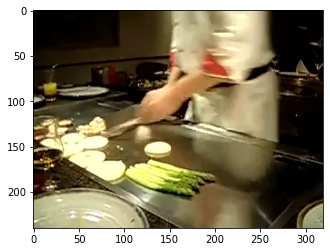

In [5]:
# visualize a single frame image
# opencv read images for bgr, convert it before visualize, you can also choose 
im_rgb = cv2.cvtColor(imgarr[38], cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [6]:
gray = cv2.cvtColor(imgarr[38],cv2.COLOR_BGR2GRAY)

In [9]:
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

In [10]:
img=cv2.drawKeypoints(gray,kp,gray)
cv2.imwrite('sift_keypoints.jpg',img)

True

In [11]:
img=cv2.drawKeypoints(gray,kp,gray,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints2.jpg',img)

True

In [14]:
# the image is 240 pixel in height, 320 pixel width, and 3 in channel(rgb)
im_rgb.shape

(240, 320, 3)

In [33]:
# plot images in sequence
def plot_sequence(imgarr,idx,n_row,n_col):
    imgs = [cv2.cvtColor(imgarr[i], cv2.COLOR_BGR2RGB) for i in idx]
    _, axs = plt.subplots(n_row, n_col, figsize=(20, 20))
#     axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img)
    plt.show()

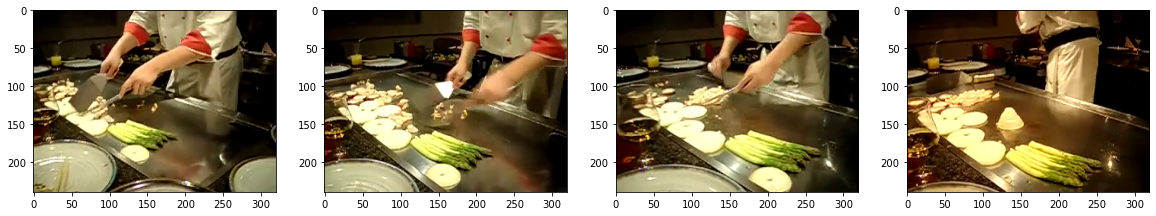

In [35]:
plot_sequence(imgarr,[2,10,30,70],1,4)